In [34]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'

In [35]:
stage='noratiocutsingleshower'

f = '/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/backgrounds_%s.root'%stage
on ='/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/OnBeam/backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/OffBeam/backgrounds_%s.root'%stage

t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)

a = rn.root2array(on,treename='tree')
df0 = pd.DataFrame(a)

b = rn.root2array(off,treename='tree')
df1 = pd.DataFrame(b)

In [36]:
print df0.shape, df1.shape, df.shape
#print df.info()

(553, 27) (43, 27) (2574, 27)


In [37]:
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
cc0pi0_v = df.query('bkgd_id == 3')
nc1pi0_v = df.query('bkgd_id == 4')
nc0pi0_v = df.query('bkgd_id == 5')
oth_v = df.query('bkgd_id == 6')

# Need to adjust cosmic label
colors_tst = ['purple','yellow','lime','green','lightskyblue','salmon'] 
labels_tst = ['Other','Cosmic','NC $\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']
#labels_tst = ['Other','Cosmic','NC 1-$\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']
#colors_tst = ['slateblue','salmon','yellow','dimgrey','lightskyblue','mediumseagreen'] 
#stage= 'COLOROPTION0'

In [38]:
tot_on = 543584 #541554 #525613
tot_off = 301061 #218466 #379202
tot_bnbcos = 232250 #384200 #101600

scale_intime = 10.279 
int_per_1e20POT = 99035.2 
dataPOT = 0.495 * (tot_on) / 567157 #547616  
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 

off_to_on = 1.23 * (400675./tot_off) * (tot_on/567157.)
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

var = 'mu_startx'

oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc0pi0_w = [ mc_to_onbeam for i in xrange(len(nc0pi0_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
cc0pi0_w = [ mc_to_onbeam for i in xrange(len(cc0pi0_v[var].values)) ] 
sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 

cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 

weights = [oth_w,cos_w,nc1pi0_w,nc0pi0_w,cc0pi0_w,sig_w]

all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)) ] 

POTS :  0.474426093657 2.34512577346
MC to OnBeam :  0.202303048743
Off to OnBeam:  1.56893960342


In [39]:
print 'Signal : ', cc1pi0_v.shape[0]
print 'Backgorunds: '
print ' Cosmic : ', cos_v.shape[0]
print ' CC0pi0 : ', cc0pi0_v.shape[0]
print ' NC pi0 : ', nc1pi0_v.shape[0]
print ' NC0pi0 : ', nc0pi0_v.shape[0]
print ' Other : ', oth_v.shape[0]
print ' Cosmic Data : ' , df1.shape[0]

print '\nSignal : ', len(sig_w) * mc_to_onbeam 
print 'Backgorunds: '
print ' Cosmic : ', len(cos_w) *mc_to_onbeam 
print ' CC0pi0 : ', len(cc0pi0_w)*mc_to_onbeam
print ' NC pi0 : ', len(nc1pi0_w)*mc_to_onbeam
print ' NC0pi0 : ', len(nc0pi0_w)*mc_to_onbeam
print ' Other : ', len(oth_w)*mc_to_onbeam

print ' Cosmic (Data) : ', len(cos_ext_w) * off_to_on

print 'All : ', df.shape[0] * mc_to_onbeam

Signal :  1050
Backgorunds: 
 Cosmic :  225
 CC0pi0 :  756
 NC pi0 :  291
 NC0pi0 :  81
 Other :  171
 Cosmic Data :  43

Signal :  212.41820118
Backgorunds: 
 Cosmic :  45.5181859671
 CC0pi0 :  152.94110485
 NC pi0 :  58.8701871841
 NC0pi0 :  16.3865469482
 Other :  34.593821335
 Cosmic (Data) :  67.4644029472
All :  520.728047464


In [40]:
def makeOnOffPlots(var,xmin,xmax,nbins=20,xlabel=''):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_m = x_off*off_to_on
     
    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off)
    err_mc = np.sqrt(bnbcos_m)
    err_mc_off = np.sqrt(err_mc * err_mc + err_off * err_off)
    err_on_off = np.sqrt(err_on * err_on + err_off * err_off)

    lgd = 0
    colors = ['grey','yellow','purple','lime','green','lightskyblue','salmon'] 
    labels = ['Cosmic - In Time (Data)', 'Cosmic - Neutrino Flash','Other','NC $\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']
    weights = [cos_ext_w,cos_w,oth_w,nc1pi0_w,nc0pi0_w,cc0pi0_w,sig_w]

    #plt.figure()
    fig,ax = plt.subplots(figsize=(8,6))
    ax.hist([df1[var].values,cos_v[var].values,oth_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values,cc1pi0_v[var].values],bins=nbins,label=labels,color=colors,stacked=True,\
         range=(xmin,xmax),weights=weights,rwidth=bin_width,histtype='stepfilled')
    plt.bar(bins - bin_width/2,err_mc_off*2,width=bin_width,bottom = bnbcos_m + off_m - err_mc_off,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on,xerr=bin_width/2,yerr=err_on,fmt='ko',label='OnBeam',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels()
    if var == 'mu_startx' or var == 'mu_starty' or var == 'mu_startz' or \
       var == 'mu_endx' or var == 'mu_endy' or var == 'mu_endz' or \
         var == 'vtx_x' or var == 'vtx_y' or var == 'vtx_z':
        lgd = plt.legend(handles=handles,fontsize=12,loc='upper left',bbox_to_anchor=(1,0.7))
    else:
        lgd = plt.legend(handles=handles,fontsize=12,loc=0) #,loc='upper left',bbox_to_anchor=(1,0.9))
   
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('N Events',fontsize=18,weight='bold')
    plt.ylim(0)
    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Physics_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

In [41]:
print df.shape

counts, bins = np.histogram(df.nshrs.values,bins=5,range=(0,5))
print counts
float(23557 + 4892)/29879

(2574, 27)
[   0 1565  789  177   38]


0.9521402992068008

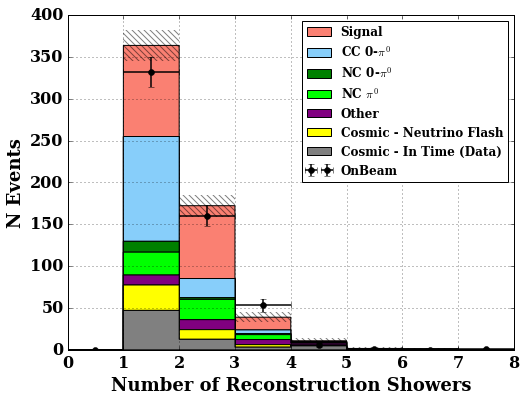

In [42]:
makeOnOffPlots('nshrs',0,8,nbins=8,xlabel='Number of Reconstruction Showers')

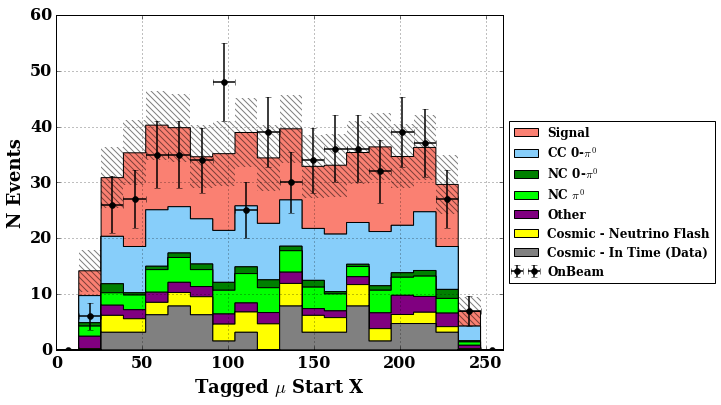

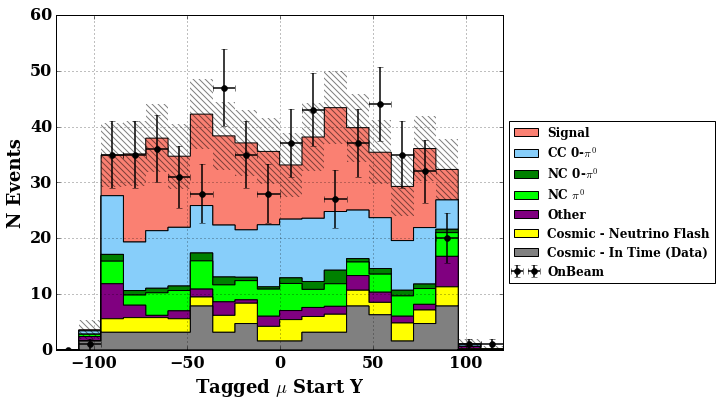

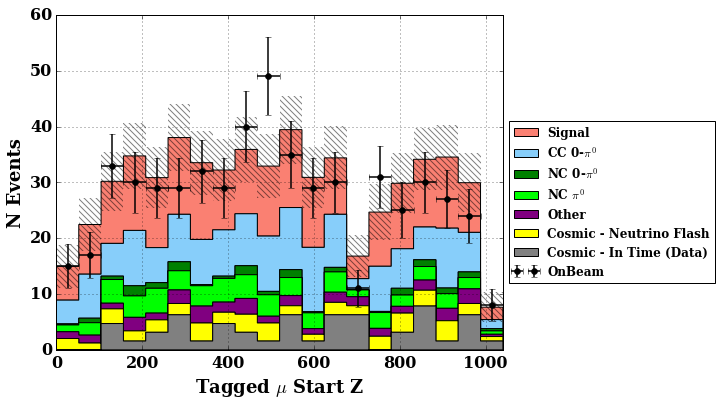

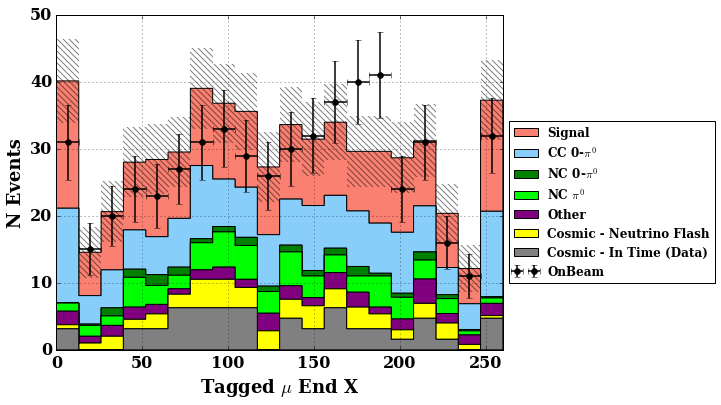

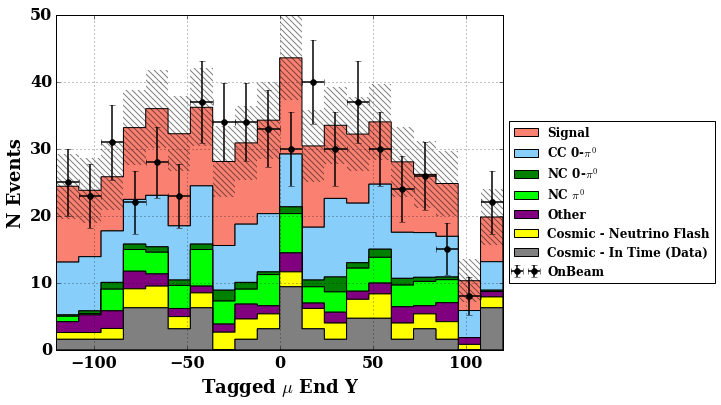

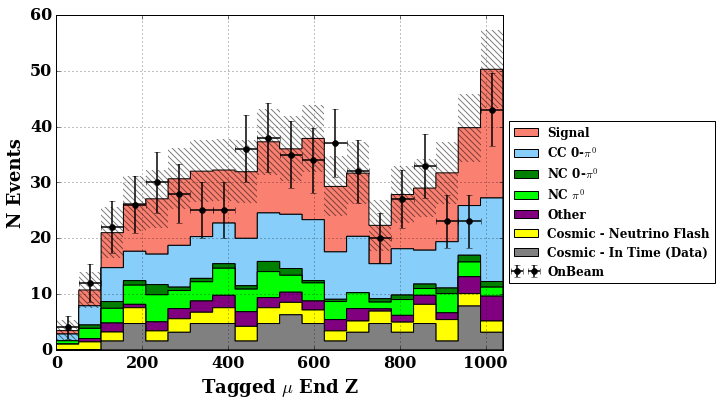

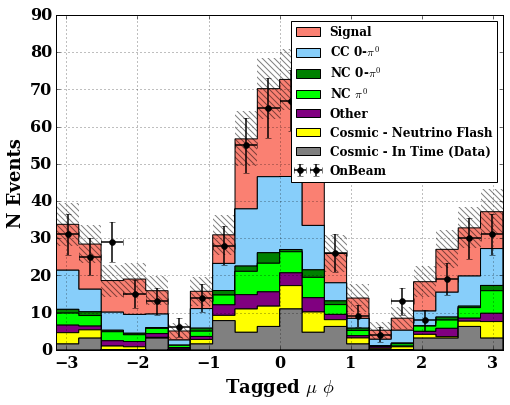

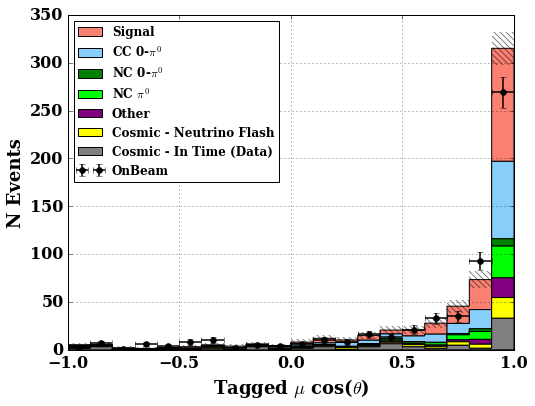

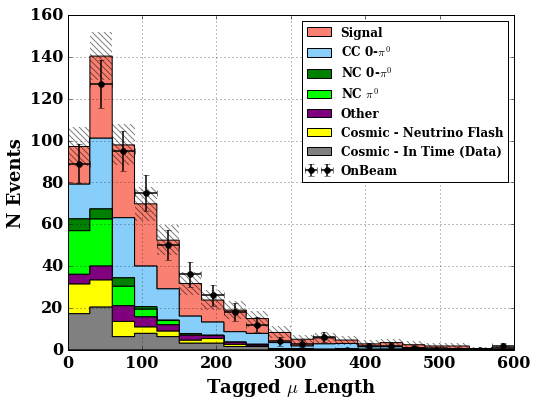

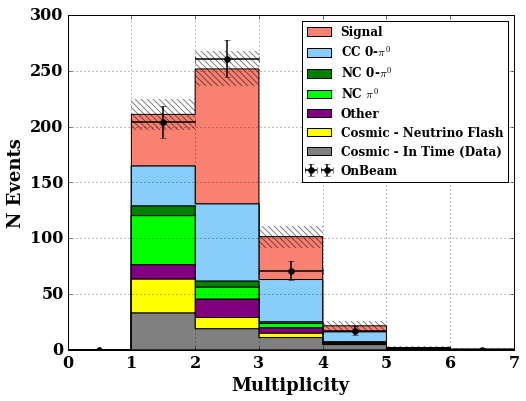

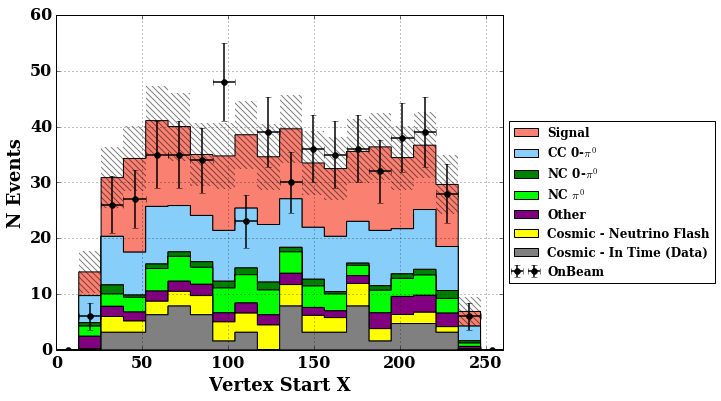

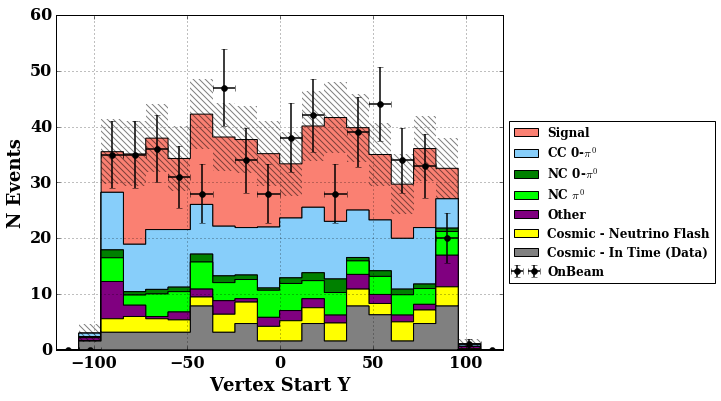

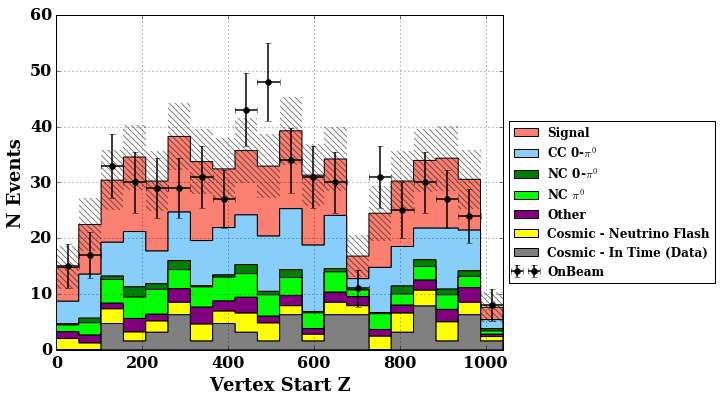

In [43]:
makeOnOffPlots('mu_startx',0,260,xlabel='Tagged $\mu$ Start X')
makeOnOffPlots('mu_starty',-120,120,xlabel='Tagged $\mu$ Start Y')
makeOnOffPlots('mu_startz',0,1040,xlabel='Tagged $\mu$ Start Z')
makeOnOffPlots('mu_endx',0,260,xlabel='Tagged $\mu$ End X')
makeOnOffPlots('mu_endy',-120,120,xlabel='Tagged $\mu$ End Y')
makeOnOffPlots('mu_endz',0,1040,xlabel='Tagged $\mu$ End Z')

makeOnOffPlots('mu_phi',-3.14,3.14,xlabel='Tagged $\mu$ $\\phi$')
makeOnOffPlots('mu_angle',-1,1,xlabel='Tagged $\mu$ cos($\\theta$)')
makeOnOffPlots('mu_len',0,600,xlabel='Tagged $\mu$ Length')
makeOnOffPlots('mult',0,7,nbins=7,xlabel='Multiplicity')
makeOnOffPlots('vtx_x',0,260,xlabel='Vertex Start X')
makeOnOffPlots('vtx_y',-120,120,xlabel='Vertex Start Y')
makeOnOffPlots('vtx_z',0,1040,xlabel='Vertex Start Z')


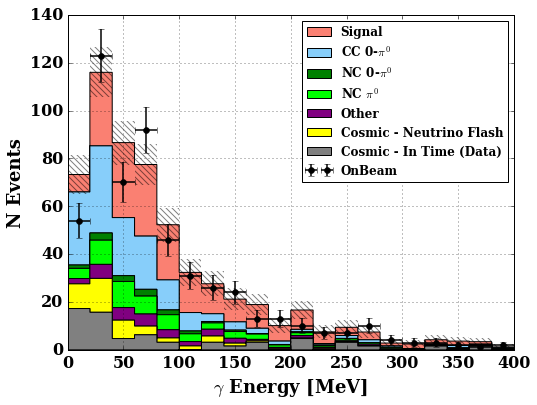

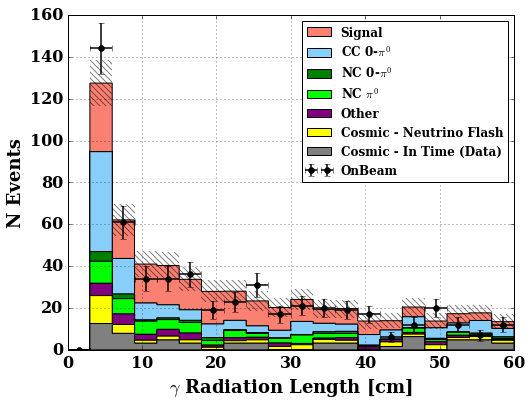

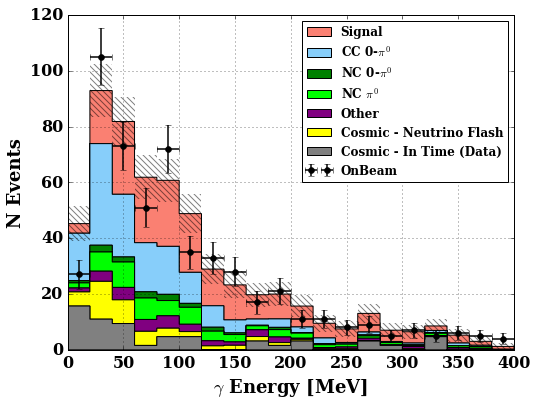

In [46]:
#Single Shower plots
#makePlots('gamma_E',0,400,xlabel='$\\gamma$ Energy [MeV]')
#makePlots('gamma_RL',0,60,xlabel='$\\gamma$ Radiation Length [cm]')
makeOnOffPlots('gamma_E',0,400,xlabel='$\\gamma$ Energy [MeV]')
makeOnOffPlots('gamma_RL',0,60,xlabel='$\\gamma$ Radiation Length [cm]')

df0['gamma_E_corr'] = df0['gamma_E'] / 0.77
df1['gamma_E_corr'] = df1['gamma_E'] / 0.77
df['gamma_E_corr'] = df['gamma_E'] / 0.77

cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
cc0pi0_v = df.query('bkgd_id == 3')
nc1pi0_v = df.query('bkgd_id == 4')
nc0pi0_v = df.query('bkgd_id == 5')
oth_v = df.query('bkgd_id == 6')

makeOnOffPlots('gamma_E_corr',0,400,xlabel='$\\gamma$ Energy [MeV]')

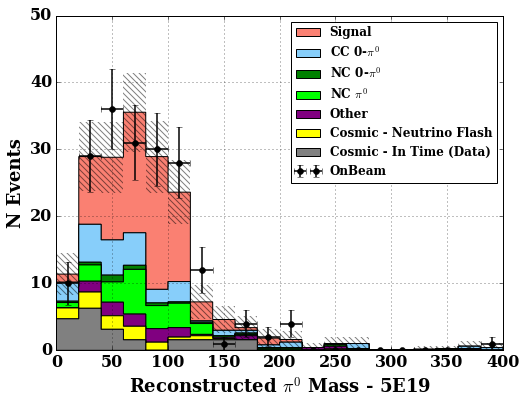

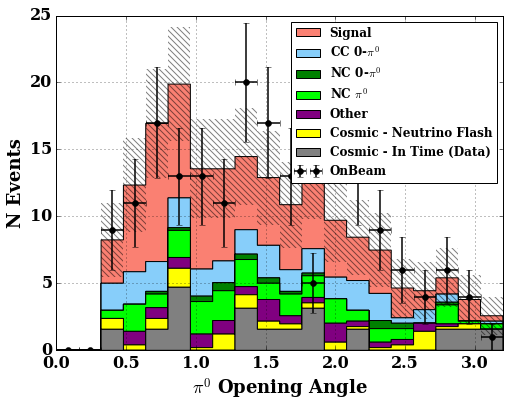

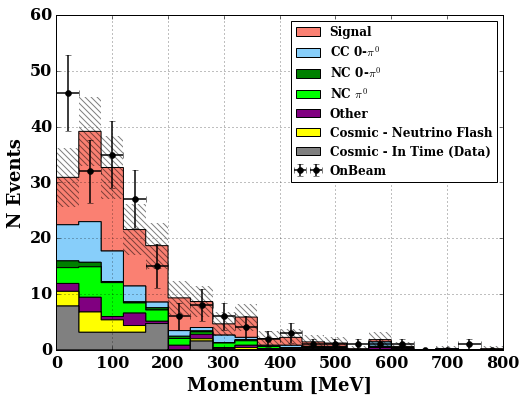

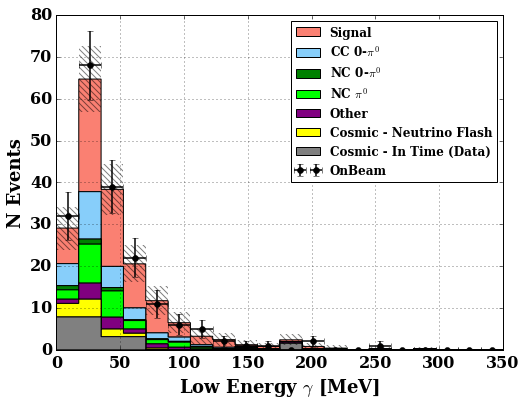

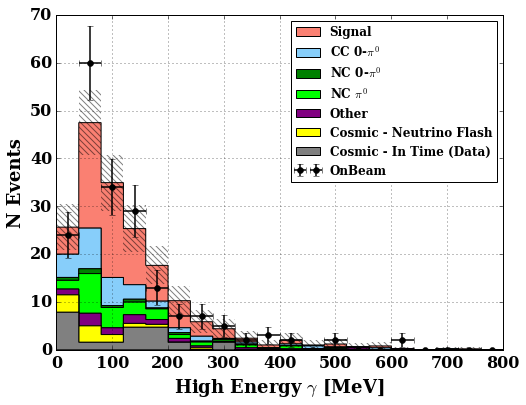

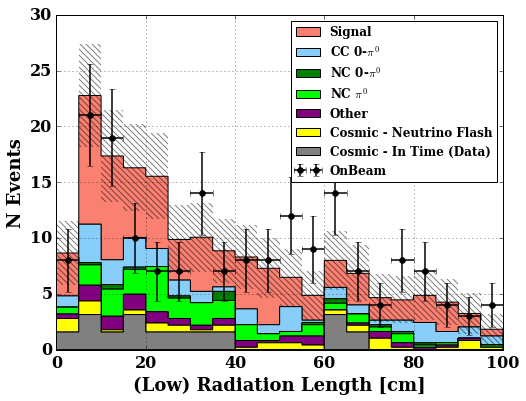

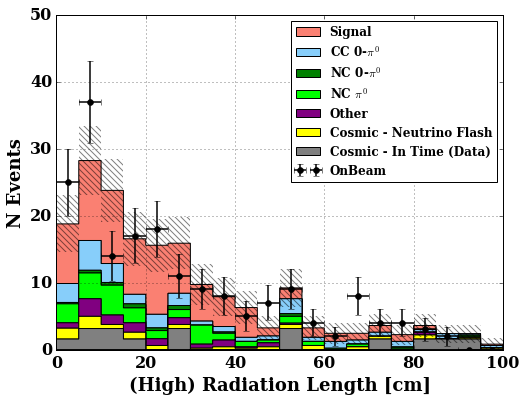

In [16]:
makeOnOffPlots('pi0_mass',0,400,xlabel='Reconstructed $\pi^0$ Mass - 5E19')
makeOnOffPlots('pi0_oangle',0,3.2,xlabel='$\pi^0$ Opening Angle')
makeOnOffPlots('pi0_mom',0,800,xlabel='Momentum [MeV]')
makeOnOffPlots('pi0_low_shrE',0,350,xlabel='Low Energy $\\gamma$ [MeV]')
makeOnOffPlots('pi0_high_shrE',0,800,xlabel='High Energy $\\gamma$ [MeV]')
makeOnOffPlots('pi0_low_radL',0,100,xlabel='(Low) Radiation Length [cm]')
makeOnOffPlots('pi0_high_radL',0,100,xlabel='(High) Radiation Length [cm]')

In [17]:
df0['pi0_low_shrE_corr'] = df0['pi0_low_shrE'] / 0.77
df1['pi0_low_shrE_corr'] = df1['pi0_low_shrE'] / 0.77
df['pi0_low_shrE_corr'] = df['pi0_low_shrE'] / 0.77
df0['pi0_high_shrE_corr'] = df0['pi0_high_shrE'] / 0.77
df1['pi0_high_shrE_corr'] = df1['pi0_high_shrE'] / 0.77
df['pi0_high_shrE_corr'] = df['pi0_high_shrE'] / 0.77

df0['pi0_mass_corr'] = np.sqrt( 2 * df0['pi0_low_shrE_corr'] * df0['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df0['pi0_oangle'])))
df1['pi0_mass_corr'] = np.sqrt( 2 * df1['pi0_low_shrE_corr'] * df1['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df1['pi0_oangle'])))
df['pi0_mass_corr'] = np.sqrt( 2 * df['pi0_low_shrE_corr'] * df['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df['pi0_oangle'])))

cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
cc0pi0_v = df.query('bkgd_id == 3')
nc1pi0_v = df.query('bkgd_id == 4')
nc0pi0_v = df.query('bkgd_id == 5')
oth_v = df.query('bkgd_id == 6')

#print cos_v.shape[0] + nc_v.shape[0] + mult_v.shape[0] + sig_v.shape[0] + ccoth_v.shape[0] + test_v.shape[0]

colors_tst = ['purple','yellow','lime','green','lightskyblue','salmon'] #magenta','tan']
labels_tst = ['Other','Cosmic','NC 1-$\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']

In [18]:
print df0['pi0_low_shrE_corr'].values[:5]
print df0['pi0_low_shrE'].values[:5]

print df0['pi0_high_shrE_corr'].values[:5]
print df0['pi0_high_shrE'].values[:5]
print
print df0['pi0_mass_corr'].values[:5]
print df0['pi0_mass'].values[:5]

[ 30.17216301  64.58252716  42.11518478  44.5029068   49.23003006]
[ 23.23256493  49.72854614  32.42869186  34.26723862  37.90712357]
[  88.27791595  102.17532349  114.39761353   81.0355072    52.31017303]
[ 67.97399139  78.67499542  88.08615875  62.39733887  40.27883148]

[ 64.42132568  94.03820038  82.32823944  96.16262817  91.95861816]
[ 49.60441971  72.4094162   63.39274216  74.04521942  70.80813599]


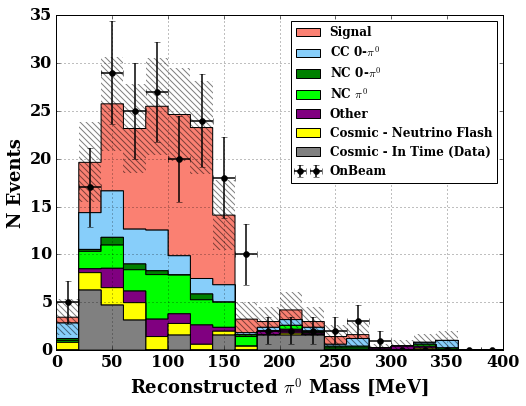

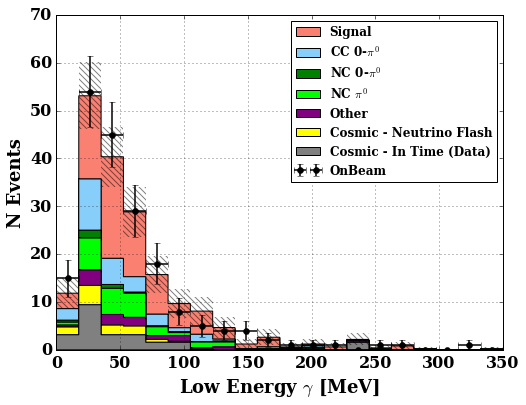

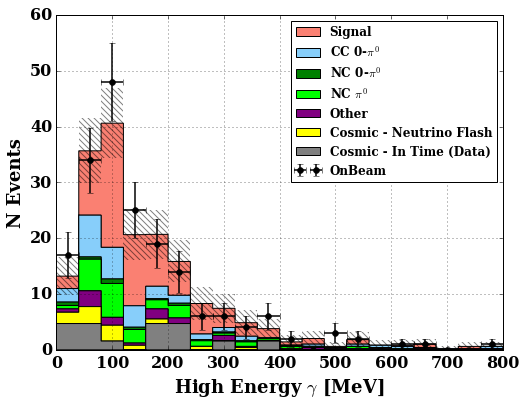

In [19]:
#makePlots('pi0_mass_corr',0,400,xlabel='Reconstructed $\pi^0$ Mass [MeV]')
makeOnOffPlots('pi0_mass_corr',0,400,xlabel='Reconstructed $\pi^0$ Mass [MeV]')
makeOnOffPlots('pi0_low_shrE_corr',0,350,xlabel='Low Energy $\\gamma$ [MeV]')
makeOnOffPlots('pi0_high_shrE_corr',0,800,xlabel='High Energy $\\gamma$ [MeV]')


## Take a look next at the 0 Shower Bin backgrounds

In [18]:
stage='noratiocutsel2'

f = '/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/backgrounds_%s.root'%stage
on ='/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/OnBeam/backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/OffBeam/backgrounds_%s.root'%stage

t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)
df = df.query('nshrs == 0')

a = rn.root2array(on,treename='tree')
df0 = pd.DataFrame(a)
df0 = df0.query('nshrs == 0')

b = rn.root2array(off,treename='tree')
df1 = pd.DataFrame(b)
df1 = df1.query('nshrs == 0')


stage = 'sel2_0showers'

In [19]:
var = 'mu_startx'

cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
cc0pi0_v = df.query('bkgd_id == 3')
nc1pi0_v = df.query('bkgd_id == 4')
nc0pi0_v = df.query('bkgd_id == 5')
oth_v = df.query('bkgd_id == 6')

oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc0pi0_w = [ mc_to_onbeam for i in xrange(len(nc0pi0_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
cc0pi0_w = [ mc_to_onbeam for i in xrange(len(cc0pi0_v[var].values)) ] 
sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 
cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 

weights = [oth_w,cos_w,nc1pi0_w,nc0pi0_w,cc0pi0_w,sig_w]

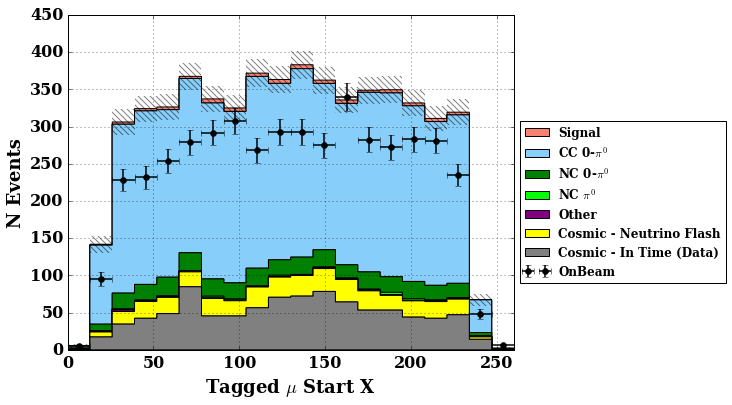

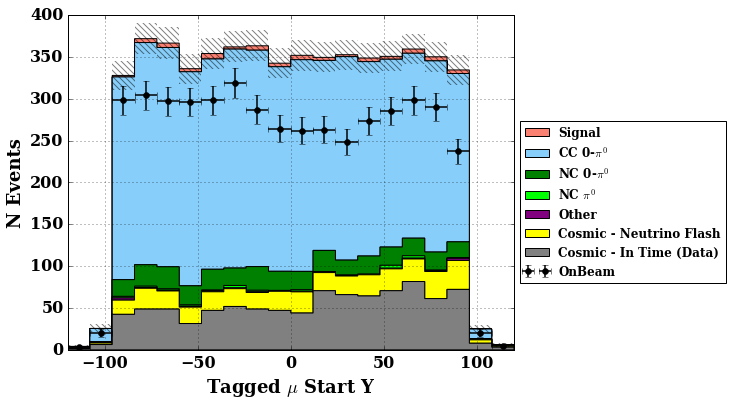

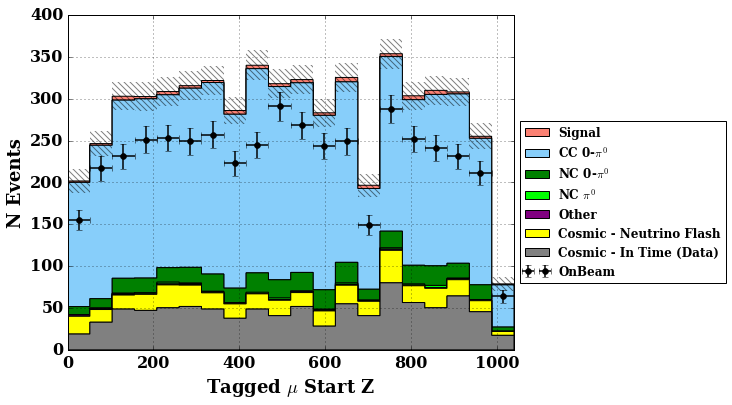

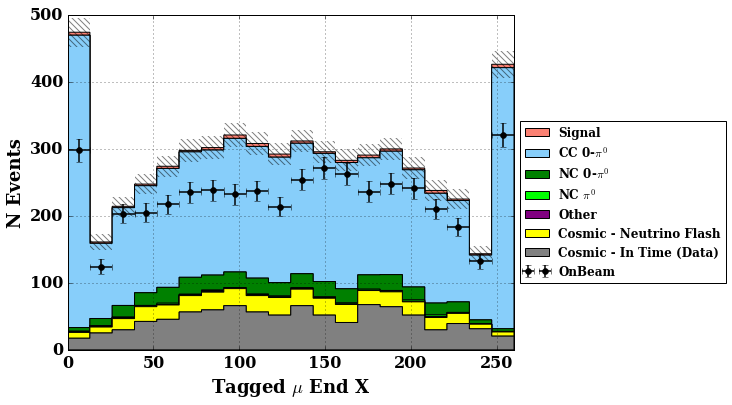

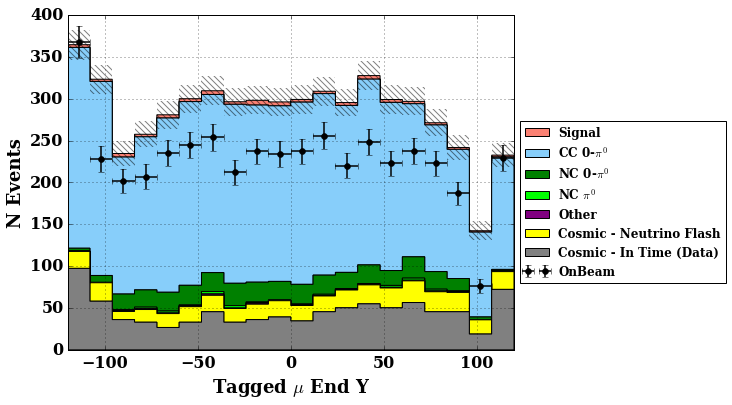

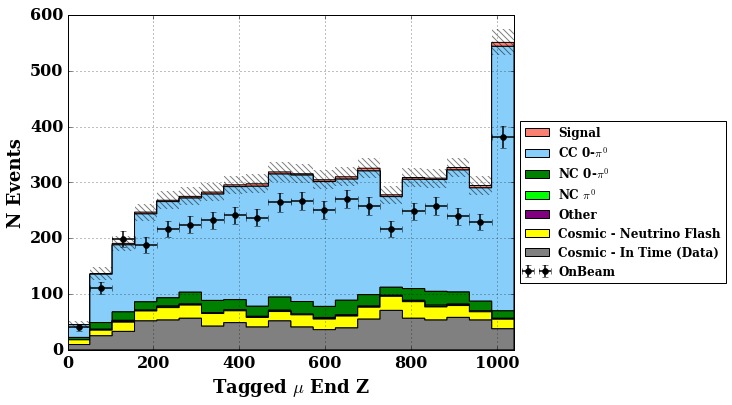

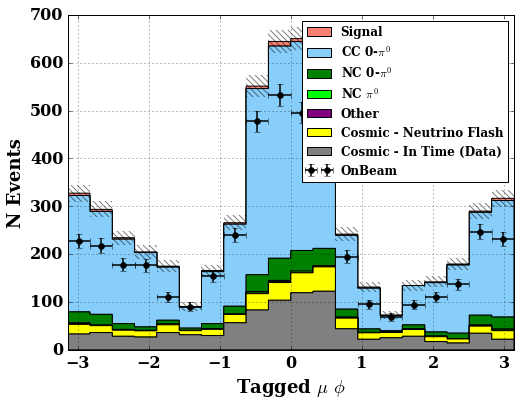

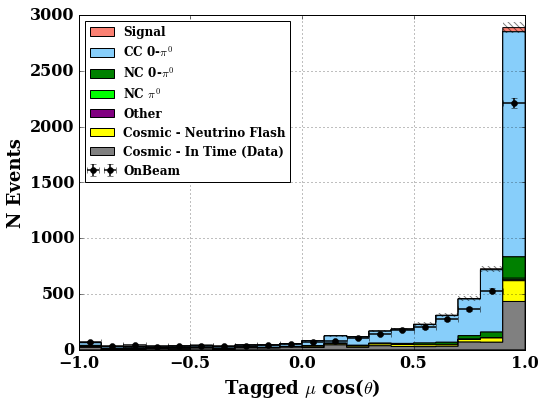

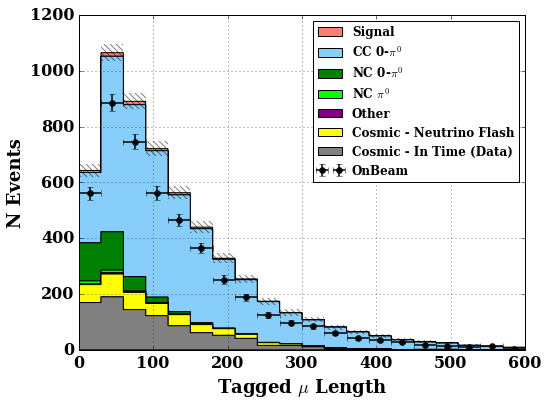

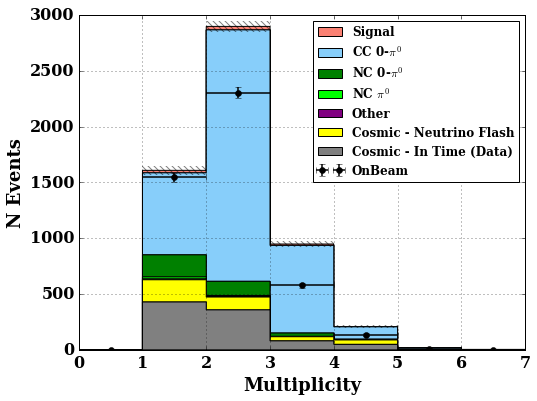

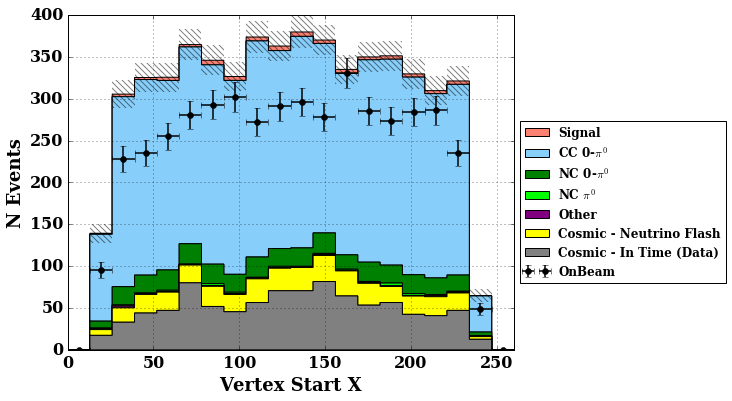

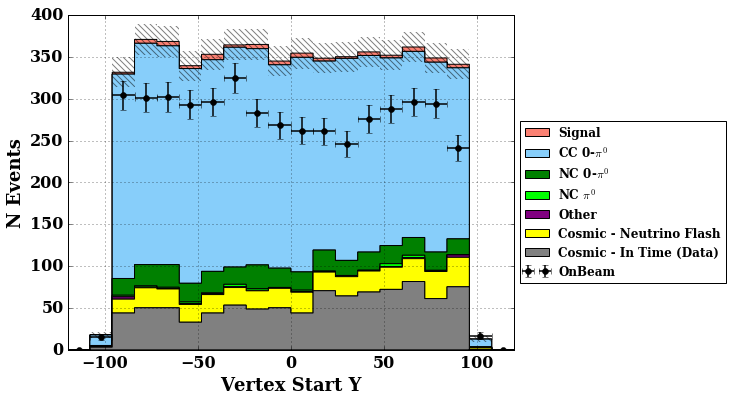

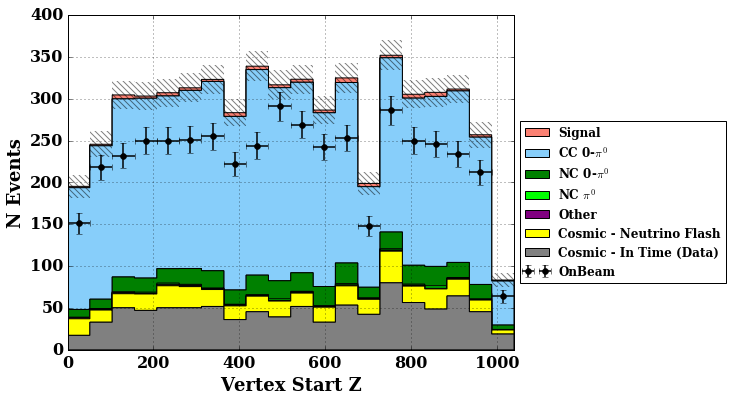

In [20]:
makeOnOffPlots('mu_startx',0,260,xlabel='Tagged $\mu$ Start X')
makeOnOffPlots('mu_starty',-120,120,xlabel='Tagged $\mu$ Start Y')
makeOnOffPlots('mu_startz',0,1040,xlabel='Tagged $\mu$ Start Z')
makeOnOffPlots('mu_endx',0,260,xlabel='Tagged $\mu$ End X')
makeOnOffPlots('mu_endy',-120,120,xlabel='Tagged $\mu$ End Y')
makeOnOffPlots('mu_endz',0,1040,xlabel='Tagged $\mu$ End Z')

makeOnOffPlots('mu_phi',-3.14,3.14,xlabel='Tagged $\mu$ $\\phi$')
makeOnOffPlots('mu_angle',-1,1,xlabel='Tagged $\mu$ cos($\\theta$)')
makeOnOffPlots('mu_len',0,600,xlabel='Tagged $\mu$ Length')
makeOnOffPlots('mult',0,7,nbins=7,xlabel='Multiplicity')
makeOnOffPlots('vtx_x',0,260,xlabel='Vertex Start X')
makeOnOffPlots('vtx_y',-120,120,xlabel='Vertex Start Y')
makeOnOffPlots('vtx_z',0,1040,xlabel='Vertex Start Z')

## Log for multiplicity plot

In [49]:
def ughNShrs(var,xmin,xmax,nbins=20,xlabel=''):
    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_m = x_off*off_to_on
     
    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off)
    err_mc = np.sqrt(bnbcos_m)
    err_mc_off = np.sqrt(err_mc * err_mc + err_off * err_off)
    err_on_off = np.sqrt(err_on * err_on + err_off * err_off)

    lgd = 0
    colors = ['grey','yellow','purple','lime','green','lightskyblue','salmon'] 
    labels = ['Cosmic - In Time (Data)', 'Cosmic - Neutrino Flash','Other','NC $\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']
    weights = [cos_ext_w,cos_w,oth_w,nc1pi0_w,nc0pi0_w,cc0pi0_w,sig_w]

    #plt.figure()
    fig,ax = plt.subplots(figsize=(8,6))
    ax.hist([df1[var].values,cos_v[var].values,oth_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values,cc1pi0_v[var].values],bins=nbins,label=labels,color=colors,stacked=True,\
         range=(xmin,xmax),weights=weights,rwidth=bin_width,histtype='stepfilled')
    plt.bar(bins - bin_width/2,err_mc_off*2,width=bin_width,bottom = bnbcos_m + off_m - err_mc_off,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on,xerr=bin_width/2,yerr=err_on,fmt='ko',label='OnBeam',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels()
    if var == 'mu_startx' or var == 'mu_starty' or var == 'mu_startz' or \
       var == 'mu_endx' or var == 'mu_endy' or var == 'mu_endz' or \
         var == 'vtx_x' or var == 'vtx_y' or var == 'vtx_z':
        lgd = plt.legend(handles=handles,fontsize=12,loc='upper left',bbox_to_anchor=(1,0.7))
    else:
        lgd = plt.legend(handles=handles,fontsize=12,loc=0) #,loc='upper left',bbox_to_anchor=(1,0.9))
   
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('N Events',fontsize=18,weight='bold')
    #plt.ylim(0.1)
    plt.yscale('log')
    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Physics_%s_onoffseparate_%s_log.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

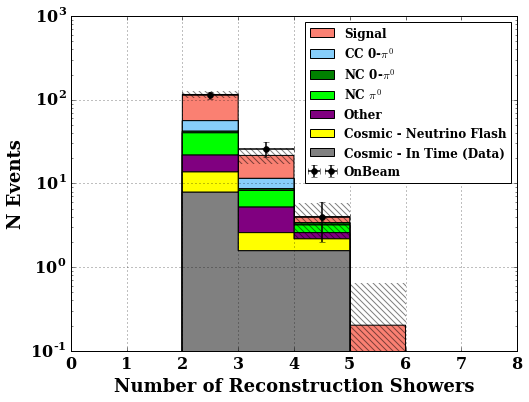

In [50]:
ughNShrs('nshrs',0,8,nbins=8,xlabel='Number of Reconstruction Showers')

In [ ]:
# Also, get peak + sigma
from scipy.optimize import curve_fit

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def crystal_ball(x,*params):

    x = x+0j # Prevent warnings...
    N, a, n, xb, sig = params
    aa = abs(a)
    A = (n/aa)**n * np.exp(- aa**2 / 2)
    B = n/aa - aa
    total = 0.*x
    total += ((x-xb)/sig  > -a) * N * np.exp(- (x-xb)**2/(2.*sig**2))
    total += ((x-xb)/sig <= -a) * N * A * (B - (x-xb)/sig)**(-n)
    try:
        return total.real
    except:
        return total
    return total

In [ ]:
plt.figure(figsize=(8,6))
n_counts,bin_edges,_ = plt.hist(df['pi0_mass_corr'].values,bins=20,range=(0,400))
bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_size = bin_edges[1] - bin_edges[0]

In [ ]:
# Calculate Gaussian distribution
# params: N, a, n, xb, sig
#         amplitude, something, exp power, gaus mean, gaus sig 
coeff, _ = curve_fit(crystal_ball, bins, n_counts, p0=([130.,0.01,1,135.,50.]))
x_g = np.linspace(0,400,100)

coeff2, _ = curve_fit(gauss, bins, n_counts, p0=([27.,130.,50.]))

fig = plt.figure(figsize=(8,6))
plt.plot(x_g, crystal_ball(x_g,*coeff), 'b-',label='$\\mu$ = %.1f \n$\\sigma$ = %.1f'%(coeff[3],coeff[4]),lw=2)
#plt.plot(x_g, gauss(x_g,*coeff2), 'g-',label='$\\mu$ = %.1f \n$\\sigma$ = %.1f'%(coeff2[1],coeff2[2]),lw=2)
plt.errorbar(bins,n_counts,yerr=np.sqrt(n_counts),xerr=bin_size/2,fmt='o',color='k',lw=3,label='MC Corrected')
plt.legend(loc=0)
plt.grid(True)

In [ ]:
# Calculate Gaussian distribution
coeff, _ = curve_fit(gauss, bins, n_counts, p0=([27.,130.,50.]))
x_g = np.linspace(0,400,100)

fig = plt.figure(figsize=(8,6))
plt.plot(x_g, gauss(x_g,*coeff), 'b-',label='$\\mu$ = %.1f \n$\\sigma$ = %.1f'%(coeff[1],coeff[2]),lw=2)
plt.errorbar(bins,n_counts,yerr=np.sqrt(n_counts),xerr=bin_size/2,fmt='o',color='k',lw=3,label='MC Corrected')
plt.legend(loc=0)
plt.grid(True)

In [ ]:
plt.figure(figsize=(8,6))
n_counts,bin_edges,_ = plt.hist(df['pi0_mass'].values,bins=20,range=(0,400))
bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_size = bin_edges[1] - bin_edges[0]

In [ ]:
# Calculate Gaussian distribution
coeff, _ = curve_fit(gauss, bins, n_counts, p0=([27.,130.,50.]))
x_g = np.linspace(0,400,100)

fig = plt.figure(figsize=(8,6))
plt.plot(x_g, gauss(x_g,*coeff), 'b-',label='$\\mu$ = %.1f \n$\\sigma$ = %.1f'%(coeff[1],coeff[2]),lw=2)
plt.errorbar(bins,n_counts,yerr=np.sqrt(n_counts),xerr=bin_size/2,fmt='o',color='k',lw=3,label='MC Corrected')
plt.legend(loc=0)
plt.grid(True)

In [ ]:
def makePlots(var,xmin,xmax,nbins=20,xlabel=''):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_min_on_m = x_on - x_off*off_to_on

    off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off)
    err_data = np.sqrt(err_on * err_on + err_off * err_off)
    err_mc = np.sqrt(bnbcos_m)
    lgd = 0
    
    #plt.figure()
    fig,ax = plt.subplots(figsize=(8,6))
    #ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
    #      cc0pi0_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
    #     range=(xmin,xmax),weights=weights[:-1],rwidth=bin_width,histtype='stepfilled')
    #plt.bar(bins - bin_width/2,err_mc*2,width=bin_width,bottom = bnbcos_m - err_mc,\
    #    alpha=.5,color='r',linewidth=0,label='Monte Carlo')
    ax.hist([oth_v[var].values,cos_v[var].values,nc1pi0_v[var].values,nc0pi0_v[var].values,\
          cc0pi0_v[var].values,cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,stacked=True,\
         range=(xmin,xmax),weights=weights,rwidth=bin_width,histtype='stepfilled')
    plt.bar(bins - bin_width/2,err_mc*2,width=bin_width,bottom = bnbcos_m - err_mc,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')#,label='Monte Carlo')
    plt.errorbar(bins,off_min_on_m,xerr=bin_width/2,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels()
    if var == 'mu_startx' or var == 'mu_starty' or var == 'mu_startz' or \
       var == 'mu_endx' or var == 'mu_endy' or var == 'mu_endz' or \
         var == 'vtx_x' or var == 'vtx_y' or var == 'vtx_z':
        lgd = plt.legend(handles=handles,fontsize=12,loc='upper left',bbox_to_anchor=(1,0.7))
    else:
        lgd = plt.legend(handles=handles,fontsize=12,loc=0) #,loc='upper left',bbox_to_anchor=(1,0.9))
    
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('N Events',fontsize=18,weight='bold')
    plt.ylim(0)
    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Physics_%s_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
makePlots('mu_startx',0,260,xlabel='Tagged $\mu$ Start X')
makePlots('mu_starty',-120,120,xlabel='Tagged $\mu$ Start Y')
makePlots('mu_startz',0,1040,xlabel='Tagged $\mu$ Start Z')
makePlots('mu_endx',0,260,xlabel='Tagged $\mu$ End X')
makePlots('mu_endy',-120,120,xlabel='Tagged $\mu$ End Y')
makePlots('mu_endz',0,1040,xlabel='Tagged $\mu$ End Z')

makePlots('mu_phi',-3.14,3.14,xlabel='Tagged $\mu$ $\\phi$')
makePlots('mu_angle',-1,1,xlabel='Tagged $\mu$ cos($\\theta$)')
makePlots('mu_len',0,600,xlabel='Tagged $\mu$ Length')
makePlots('mult',0,7,nbins=7,xlabel='Multiplicity')

makePlots('vtx_x',0,260,xlabel='Vertex Start X')
makePlots('vtx_y',-120,120,xlabel='Vertex Start Y')
makePlots('vtx_z',0,1040,xlabel='Vertex Start Z')

In [ ]:
makePlots('pi0_mass',0,400,xlabel='Reconstructed $\pi^0$ Mass - 5E19')
makePlots('pi0_oangle',0,3.2,xlabel='$\pi^0$ Opening Angle')
makePlots('pi0_mom',0,800,xlabel='Momentum [MeV]')
makePlots('pi0_low_shrE',0,350,xlabel='Low Energy $\\gamma$ [MeV]')
makePlots('pi0_high_shrE',0,800,xlabel='High Energy $\\gamma$ [MeV]')
makePlots('pi0_low_radL',0,60,xlabel='(Low) Radiation Length [cm]')
makePlots('pi0_high_radL',0,60,xlabel='(High) Radiation Length [cm]')